# Cryptography test suite

### _Private auxiliary functions

In [37]:
def _to_binary(message):
    return bin(message)[2:].zfill(8)

In [38]:
def _xor_letters(key, letter):
    # Convert letters into integers using ord()
    # Then, convert them in binary using 'bin()', and trim their prefix '0b' using [2:]
    # Finally, fill with 0 to the left until length of the string is 8 characters using 'zfill(8)'
    bin_letter1 = _to_binary(key)
    bin_letter2 = _to_binary(ord(letter))

    # bitwise XOR
    result = ''.join(str(int(bit1) ^ int(bit2)) for bit1, bit2 in zip(bin_letter1, bin_letter2))

    # Convert the binary in char using 'chr()'
    return chr(int(result, 2))

### Euclid extended algorithm


The Euclid Extended Algorithm is used to find gcd '*d*' of two prime numbers and two values *x* and *y* so that can be satisfied the following equation: $$ax + by = d = gcd(a,b)$$

Given *a* and *b*, we want to find the tuple (*x*, *y*, *d*). The algorithm is the following

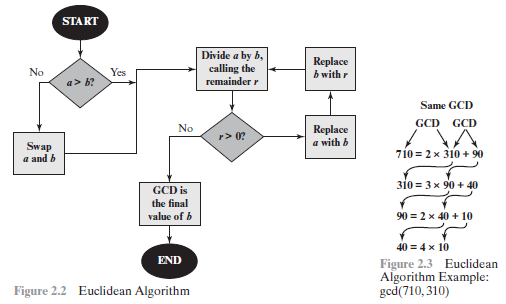

In [32]:
def euclid_extended(a, b):
    '''
        Finds the greatest common divisor between a and b, and their factors x and y

        Parameters
        ----------
            a (int): first number
            b (int): second number

        Returns
        -------
            gcd (int): the greatest common divisor between a and b
            x (int): the factor x
            y (int): the factor y
    '''

    # Swap a and b if a is lesser than b
    if a < b:
        c = a
        a = b
        b = c
    
    # First iteration
    r = a % b
    q = a // b

    x0 = 1 
    y0 = 0 
    x1 = 0 
    y1 = 1

    x2 = x0 - q * x1
    y2 = y0 - q * y1

    # Iterate until the remainer is 0
    # Last value of b will be the gcd
    while r != 0:
        a = b
        b = r
        r = a % b
        q = a // b

        if r != 0:
            x0 = x1
            y0 = y1
            x1 = x2
            y1 = y2

            x2 = x0 - q * x1
            y2 = y0 - q * y1

    return b, x2, y2


In [33]:
a = 1759
b = 550

gcd, x2, y2 = euclid_extended(a, b)
gcd, x2, y2

(1, -111, 355)

### Ceasar cypher

In [ ]:
def caesar(plaintext: str, op_mode="enc"):

    plaintext = plaintext.lower()

    alphabet = "abcdefghijklmnopqrstuvwxyz"  # mod 26

    assert op_mode == "enc" or op_mode == "dec", "op_mode should be 'enc' for encryption or 'dec' for decryption"

    cyp = ""

    if op_mode == "enc":
        for ch in plaintext:
            i_cyp = (alphabet.index(ch) + 3) % 26

            cyp += alphabet[i_cyp]
    else:
        for ch in plaintext:
            i_cyp = (alphabet.index(ch) - 3) % 26

            cyp += alphabet[i_cyp]
        

    return cyp

In [ ]:
# Encryption
x = caesar("Attackatdawn")
print(x)

# Decryption
x = caesar(x, op_mode="dec")
x

### Linear congruential generator

Linear congurential generator takes 4 inputs:
- *m* the modulus   $\hspace{35pt}   m > 0$
- *a* the multiplier    $\hspace{35pt}   0 < a < m$
- *c* the increment     $\hspace{35pt}   0 \leq c < m$
- *$X_0$* the starting value, i.e.: the seed    $\hspace{35pt}  0 \leq X_0 < m$

And the sequence ${X_n}$ is obtained with this logic:

$$ X_{i+1} = (a X_n + c) \hspace{2pt} mod \hspace{2pt} m $$



Selection for *a*, *c* and *m* is obviously critical.

We would like to be *m* a very big number: a common criteria makes *m* close to the highest representable number from a computer, which is arount $2^{31}$

The generator function must pass 3 tests:
1. Function should generate all numbers between $0$ and $m - 1$ before repeating
2. The generated sequence should appear random
3. The function should implement efficiently with a 32-bit arithmetic

It has been proved that is *m* is prime and *c* = 0, tests are passed for certain values of *a*.

A common value for 32-bit arithmetic is $m = 2^{31} - 1$

Thus, the generating function becomes:
$$X_{n+1} = (a X_n + 0) \hspace{3pt} mod \hspace{3pt} (2^{31}-1)$$

and a suitable value for *a* is $a = 7^5 = 16807$

In [20]:
# Linear congruential generator

def linear_congruential_generator(X0: int, m = 2147483647, a = 16807, c = 0):
    '''
        Parameters
        ----------
            m (int): the modulus. Must be > 0. Default is 2.147.483.647
            a (int): the multiplier. Must be 0 < a < m. Default is 16807
            c (int): the increment. Must be 0 <= c < m. Default is 0
            X0 (int): the starting value, i.e.: the seed. Must be 0 <= X0 < m.

        Returns
        -------
            Xn (set): a sequence of generated numbers
    '''

    # Initialize the generator
    Xn = []
    Xi = X0

    # Keep repeating until a number is not already in the set
    while True:

        # Compute next number in the sequence
        Xi = (a * Xi + c) % m
        
        # If number is not in the set, add it
        if Xi not in Xn:
            Xn.append(Xi)
            print(Xi)

        # If number is already in the set, stop the generator and return the list    
        else:
            break

    return Xn


In [ ]:
X0 = 1230394
# a = 10
# c = 20
# m = 2389

Xn = linear_congruential_generator(X0)

### Blum Blum Shub Generator

*Blum Blum Shub* (o *BBS*, nome che deriva dai cognomi degli autori), è un popolare algoritmo generatore di numeri **pseudocasuali**.

Come prima cosa, bisogna scegliere due numeri *p* e *q* tale che valga:
$$p \equiv q \equiv 3(mod \hspace{3pt} 4)$$
che equivale a dire:
$$p \hspace{3pt} mod \hspace{3pt} 4 \equiv q \hspace{3pt} mod \hspace{3pt} 4 \equiv 3$$
Poi, moltiplichiamoli tale che $n = p * q$.
Scegliamo un numero *s* tale che *p* e *q* non siano suoi fattori di *s* e quindi gli siano relativamente primi.
Quindi, *BBS* produce una serie di bit $B_i$ come previsto dal seguente algoritmo:
$$x_0 = s^2 \hspace{3pt} mod \hspace{3pt} n$$
$$for \hspace{3pt} i = 1 \hspace{3pt}  to \hspace{3pt} \infty$$
$$x_i = (x_{i-1})^2 \hspace{3pt} mod \hspace{3pt} n$$
$$B_i = x_i \hspace{3pt} mod \hspace{3pt} 2$$
Significa che si inizia scegliendo un seed ($x_0$) e da quello si calcolano i numeri successivi, i quali vengono convertiti in bit.
In particolare, viene preso ciascun bit <u>meno significativo</u> e lo si aggiunge alla sequenza di numeri.

Dato che richiede numeri molto grandi, BBS è un algoritmo lento, troppo affinché possa realmente essere utile per cifrare. È buono per generare chiavi degli algoritmi di cifratura, è imprevedibile ed è definito anche un **cryptographically secure pseudorandom bit generator (CSPRBG)** poiché passa il **next-bit test**.

Si dice che si verifica il **next-bit test** se <u>non esiste</u> un *algoritmo tempo-polinomiale di ordine k* (cioè, che ha un tempo di esecuzione limitato da un polinomio di ordine *k*) che, data in input una sequenza di *k* bit in uscita, può predire il *k+1-esimo* bit con probabilità > $1/2$.
In altre parole, significa che non esiste un algoritmo che riesce a predire se il bit successivo di una sequenza sarà 0 o 1, con probabilità > $1/2$. Ampliando il concetto a tutti i numeri della sequenza, è ovvio che significa che la sequenza stessa è imprevedibile.

La difficoltà dell'algoritmo sta nel trovare *n*, in quanto risultato dei suoi fattori *p* e *q*.

In [9]:
def bbs(p, q, s, l=20):
    '''
    Parameters
    ----------
        p (int): one of the two n factors. Toy example default value is 383
        q (int): the second of the two n factors. Toy example default value is 503
        s (int): the seed of the generator. Toy example default value is 101355
        l (int): length of the generated sequence. Default is 20
    
    Returns
    -------
        Bn (list): the generated sequence of bits
    '''

    # Initialize the sequence
    Bn = []

    # Generate n
    n = p * q

    # Generate first element of the sequence = x0
    xi = (s**2) % n

    for i in range(l):
        xi = (xi**2) % n
        Bi = xi % 2
        Bn.append(Bi)
    
    return Bn

In [10]:
p = 383
q = 503
s = 101355
l = 20

Bn = bbs(p, q, s)
Bn

[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]

### RC4

In [36]:
import random
import copy

def rc4(stream, key_index=None):

    '''
        RC4 is a stream cypher widely used for its semplicity and efficiency. It uses a variable length key.

        Parameters
        ----------
            stream (str): the first stream of plaintext RC4 will cypher/decipher
            key_index (int): the key used for ciphering/deciphering the input stream. If none, a new key will be generated. Default is 'None'

        Returns
        -------
            op_stream (str): the corresponding ciphered/deciphered stream 
    '''

    MOD = 256

    # Initialization step
    S = []

    for i in range(MOD):
        S.append(i)

    T = copy.deepcopy(S)

    # Generate a new key
    if key_index is None:
        # Choose a random key K from vector state S
        key_index = random.randint(0, MOD)
    
    print("K is", key_index)

    for i in range(MOD):
        T[i] = S[i % key_index]

    # Swap elements according to T
    j = 0
    for i in range(MOD):
        j = (j + S[i] + T[i]) % MOD
        aux = S[i]
        S[i] = S[j]
        S[j] = aux

    # Stream generation
    # Swap elements according to S
    op_stream = []    

    for stream_bit in range(len(stream)):
        i = (stream_bit + 1) % MOD
        j = (j + S[i]) % MOD

        aux = S[i]
        S[i] = S[j]
        S[j] = aux

        t = (S[i] + S[j]) % MOD
        k = S[t]

        x_cyph = _xor_letters(k, stream[stream_bit])

        op_stream.append(x_cyph)

    message = str()

    for x in op_stream:
        message += x

    return message, key_index

In [31]:
plaintext = "prova"

s, k = rc4(plaintext)

print(f"Cyphered text is: {s}\nWith key: {k}")

s, k = rc4(s, k)

print(f"Deciphered text is: {s}\nWith key: {k}")

K is 228
Cyphered text is: B=Y
With key: 228
K is 228
Deciphered text is: prova
With key: 228


### RSA

In [47]:
def RSA(M: str, e=7, n=187, p=17, q=11, op_mode="cypher"):
    '''
        Implementation of the RSA algorithm by Rivest, Shamir & Adleman.
        If you want to decipher a message, you should fill 'e' and 'n', and choose 'decipher' as 'op_mode'

        Parameters
        ----------
            M (str): the message block we want to cypher
            e (int): the public key 'e' in case you want to decipher the message block
            n (int): the result of p*q. It's a public value, so you can pass it to the function in order to decipher the message
            p (int): first chosen prime number. Default is 17
            q (int): second chosen prime number. Default is 11
            op_mode (str): operation mode of the algorithm, 'cypher' or 'decipher'. Default is 'cypher'
        

        Returns
        -------
            c (str): the cyphered block
            n (int): the result of p*q
            e (int): the public key
    '''

    assert op_mode == "cypher" or op_mode == "decipher", "op_mode must be 'cypher' or 'decipher'"

    if p is not None and q is not None:
    # Generate prime numbers
    ### prime number generation here
        pass

    # Compute n
    n = p * q

    # Compute the Euler's totient function phi(n)
    phi_n = (p - 1)*(q - 1)

    # Choose e
    ### e should be chosen as an integer such that 1 < e < phi(n). We are harcoding it this time just for testing purposes
    e = 7

    # Compute d
    d = e^(-1) % phi_n

    # Define the keys
    PU = [e, n]  # Public key

    # Initialize the message that will be returned from the algorithm
    C = str()

    if op_mode == "cypher":
        # Cypher the text
        # Convert the str into number and then into binary
        for ch in M:
            x = _to_binary(ord(ch))
            print(x, type(x))
            x = x**e % n
            C += x
    else:
        # Decipher the text
        # Convert the str into number and then into binary
        for ch in M:
            x = _to_binary(ord(ch))
            x = x**d % n
            C += x

    return C, PU

In [ ]:
M = "provacifratura"

C, PU = RSA(M)

print(f"Ciphered text: {C}\nPublic key PU is: {PU}")

e = PU[0]
n = PU[1]

original_M = RSA(M, e, n)
print(f"Original text: {M}\nPublic key PU is: {PU}")